# Manipulating FileFunction Spectra

This tutorial demonstrates some of the methods that can be used to manipulate FileFunction sources in fermipy.  For this example we'll use the draco analysis.

In [23]:
import os
if os.path.isfile('../data/draco.tar.gz'):
    !tar xzf ../data/draco.tar.gz
else:
    !curl -OL https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/draco.tar.gz
    !tar xzf draco.tar.gz


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('draco/config.yaml')
gta.setup()

2016-04-20 08:00:56 INFO     GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
This is fermipy version 0.6.8+57.gbeca.dirty.
2016-04-20 08:00:58 INFO     GTAnalysis.setup(): Running setup
2016-04-20 08:00:58 INFO     GTBinnedAnalysis.setup(): Running setup for Analysis Component: 00
2016-04-20 08:01:11 INFO     GTBinnedAnalysis.setup(): Finished setup for Analysis Component: 00
2016-04-20 08:01:11 INFO     GTAnalysis.setup(): Initializing source properties
2016-04-20 08:01:11 INFO     GTAnalysis.setup(): Finished setup


By default all sources are initialized with parametric spectral models (PowerLaw, etc.).  The spectral model of a source an be updated by calling ``set_source_spectrum()``.

In [25]:
print gta.roi['3FGL J1725.3+5853']

Name           : 3FGL J1725.3+5853
Associations   : ['3FGL J1725.3+5853', '7C 1724+5854', '2FGL J1725.2+5853']
RA/DEC         :    261.332/    58.887
GLON/GLAT      :     87.497/    33.997
TS             : nan
Npred          : 278.15
Flux           : 9.942e-10 +/-      nan
EnergyFlux     : 2.323e-06 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
Index          :     -2.179 +/-        nan
Scale          :       1701 +/-        nan
Prefactor      :  1.627e-13 +/-        nan


Running ``set_source_spectrum()`` with no additional arguments will substitute the source spectrum with a FileFunction with the same distribution in differential flux.  The normalization parameter is defined such that 1.0 corresponds to the normalization of the original source spectrum.  

In [26]:
gta.set_source_spectrum('3FGL J1725.3+5853','FileFunction')
print gta.roi['3FGL J1725.3+5853']

Name           : 3FGL J1725.3+5853
Associations   : ['3FGL J1725.3+5853', '7C 1724+5854', '2FGL J1725.2+5853']
RA/DEC         :    261.332/    58.887
GLON/GLAT      :     87.497/    33.997
TS             : 283.34
Npred          : 278.15
Flux           : 9.942e-10 +/-      nan
EnergyFlux     : 2.323e-06 +/-      nan
SpatialModel   : PointSource
SpectrumType   : FileFunction
Spectral Parameters
Normalization  :          1 +/-          0


The differential flux of a FileFunction source can be accessed or modified at runtime by calling the ``get_source_dfde()`` and ``set_source_dfde()`` methods:

60891.8571503
60979.3497856


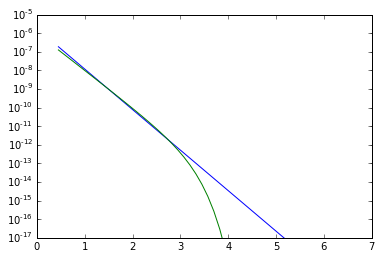

In [27]:
x, y = gta.get_source_dfde('3FGL J1725.3+5853')
y1 = 1E-12*10**(-2.0*(x-3.0))*np.exp(-10**(x-3.0))
plt.figure()
plt.plot(x,y)
plt.plot(x,y1)
plt.gca().set_yscale('log')
plt.gca().set_ylim(1E-17,1E-5)
print gta.like()
gta.set_source_dfde('3FGL J1725.3+5853',y1)
print gta.like()


Calling ``set_source_spectrum()`` with the optional dictionary argument can be used to explicitly set the parameters of the new spectral model.  

In [28]:
gta.set_source_spectrum('3FGL J1725.3+5853','PowerLaw',{'Index' : 2.179, 'Scale' : 1701, 'Prefactor' : 1.627e-13})
gta.like()

60891.85104206393